###  Swapnil Kunjir
# The Sparks Foundation
## Data Science and Business Analytics Internship
### Task 1: Prediction Using Supervised ML (Predicting percentage of students based on number of study hours using linear regression)

* **Problem Statement - Predict Score of a student if he studies for 9.25 hours/day.**

In [1]:
# All libraries required for this Analysis
import pandas as pd
import numpy as np
import matplotlib as mpl
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Reading data directly from URL
data=pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.describe().round(decimals=2)

,Hours,Scores
count,25.00,25.00
mean,5.01,51.48
std,2.53,25.29
min,1.10,17.00
25%,2.70,30.00
50%,4.80,47.00
75%,7.40,75.00
max,9.20,95.00


In [4]:
print(data.isnull().sum())

Hours     0
Scores    0
dtype: int64


In [5]:
correlation=data.corr('pearson')
print('correlation between no. of study hours/day and Marks scored is',correlation.iloc[0,1])

correlation between no. of study hours/day and Marks scored is 0.9761906560220888


**WE can clearly see No. of study hours and Marks scored in exam are highly Positively correlated.**

### Scatter Plot for finding Nature of the relationship 

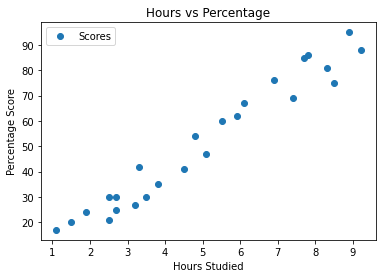

In [6]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From Scatter Plot we can see that there is strong positive linear relationship between No. of Study Hours And Marks Scored in Exam**

## Data Preparation
Here we divide data into Features(independent variable(s)) and Label (dependent variable).  
After That We split data into 80% for Traing the model and 20% for Testing that model.

In [7]:
X1=data.iloc[:,:-1].values
Y1=data.iloc[:,-1].values

In [8]:
X=X1.reshape(-1,1)
Y=Y1.reshape(-1,1)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

## Training Model
Now we will use training data to train the linear regression model.

In [10]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print('Fitted Linear Regression Equation is: y=',LR.coef_,'*x+',LR.intercept_)

Fitted Linear Regression Equation is: y= [[9.68207815]] *x+ [2.82689235]


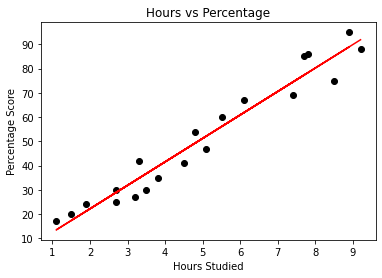

In [11]:
plt.scatter(x_train,y_train,color='k')
plt.plot(x_train,(LR.coef_*x_train+LR.intercept_),color='r')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**It can be seen regression line fits perfectly to data i.e. our model is good fit.**

## Testing model 
Using test data we will see that how accurately our model can predict scores.

In [12]:
y_predicted=LR.predict(x_test)
y_predicted

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

In [13]:
p=pd.DataFrame(zip(y_test,y_predicted),columns=['actual_score','predicted_score'])
p.astype(str)

,actual_score,predicted_score
0,[81],[83.18814104]
1,[30],[27.03208774]
2,[21],[27.03208774]
3,[76],[69.63323162]
4,[62],[59.95115347]


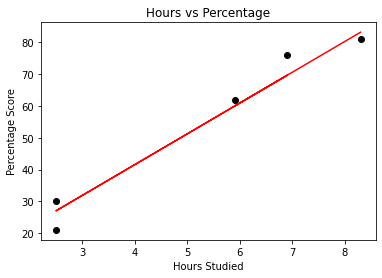

In [14]:
plt.scatter(x_test,y_test,color='k')
plt.plot(x_test,y_predicted,color='r')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [15]:
for col in p.columns:
    p[col] = p[col].str[0]
p.head()

,actual_score,predicted_score
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


C:\Users\DELL\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\style.py:60: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  [conv.to_rgba(c) for c in colors]


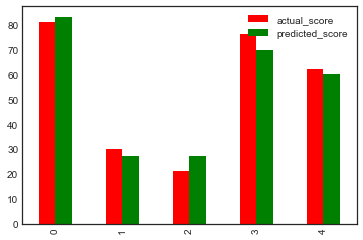

In [16]:
mpl.style.use('seaborn-white')
p.plot.bar(color='RGB')


**We can see comparison between predicted and actual values of score.**

## Model Evaluation
Here we used mean absolute error instead of mean squared error because it gives equal weightage to all observations.    Unlike mean squared error which gives more weightage to the outliers.

In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_predicted))

Mean Absolute Error: 3.9207511902099244


**It can be seen that value of mean absolute error is 3.9208 (which is low). So we caan say that our model fits data well.**  


In [18]:
r=metrics.r2_score(y_test, y_predicted, sample_weight=None, multioutput='uniform_average')
print("R-Squared Value", r)

R-Squared Value 0.9678055545167994


**Here R-Squared Value is 0.9678 Means the model explains 96.78% of variability in the dependent variable(Scores) by independent variable(Hours)**

In [19]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted)) 
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288


## Prediction 
Now we will predict score for our problem statement that is how much a student will score if he will study for 9.25 hours/day.

In [20]:
hours = np.array([9.25])
hours=hours.reshape(-1,1)
own_pred = LR.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = [92.38611528]


**From this we can say that He will Score 92.39% marks if he tudies for 9.25 hours/day.**